In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import svd
from scipy.linalg import svd, diagsvd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

df = pd.read_csv('ratings_small.csv')
matriz_notas = df.pivot_table(index='userId', columns='movieId', values='rating')
matriz_notas = matriz_notas.fillna(0)
matriz_notas.head(2)

def comprimir (u, s, vt, K):
    """Remove elementos de u, s e vt deixando somente K componentes restantes
    """ 
    u_ = u[:, :K]
    s_ = s[:K]
    vt_ = vt[:K, :]
    return u_, s_, vt_

## Teste de K

Aqui temos como objetivo testar qual o melhor K para o nosso modelo, com 20 iterações cada.

K = 300

In [4]:
# Vamos fazer agora para varias linhas
for n in range(20):
    linha = np.random.randint(0, df.__len__())
    id_usuario = df.iloc[linha]['userId']
    id_filme = df.iloc[linha]['movieId']
    nota = df.iloc[linha]['rating']
    A = deepcopy(matriz_notas)
    A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)
    nota_aleatoria = A.loc[id_usuario, id_filme]
    u, s, vt = svd(A)
    u_, s_, vt_ = comprimir(u, s, vt, 300)
    sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])
    B = u_ @ sigma @ vt_
    B = pd.DataFrame(B, index=A.index, columns=A.columns)
    print('-------------------------------------')
    print('Iteração: ', n+1)
    print('Nota do usuário para o filme: ', nota)
    print('Nota aleatória do usuário para o filme: ', nota_aleatoria)
    print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])
    # salva em um novo dataframe chamado resultados.csv
    resultados = pd.DataFrame({'nota': [nota], 'nota_aleatoria': [nota_aleatoria], 'nota_reconstruida': [B.loc[id_usuario, id_filme]]})
    if n == 0:
        resultados.to_csv('K300.csv', mode='a', header=True)
    else:
        resultados.to_csv('K300.csv', mode='a', header=False)




-------------------------------------
Iteração:  1
Nota do usuário para o filme:  3.0
Nota aleatória do usuário para o filme:  1.99622446090019
Nota do usuário para o filme na matriz B:  1.9679118307451062
-------------------------------------
Iteração:  2
Nota do usuário para o filme:  3.0
Nota aleatória do usuário para o filme:  1.257462362595394
Nota do usuário para o filme na matriz B:  0.7383167563838584
-------------------------------------
Iteração:  3
Nota do usuário para o filme:  3.5
Nota aleatória do usuário para o filme:  2.1413697938576637
Nota do usuário para o filme na matriz B:  2.2165714889707324
-------------------------------------
Iteração:  4
Nota do usuário para o filme:  3.5
Nota aleatória do usuário para o filme:  1.553717117557592
Nota do usuário para o filme na matriz B:  0.5596912802074346
-------------------------------------
Iteração:  5
Nota do usuário para o filme:  3.5
Nota aleatória do usuário para o filme:  4.194936977346258
Nota do usuário para o film

K = 200

In [5]:
# Vamos fazer agora para varias linhas
for n in range(20):
    linha = np.random.randint(0, df.__len__())
    id_usuario = df.iloc[linha]['userId']
    id_filme = df.iloc[linha]['movieId']
    nota = df.iloc[linha]['rating']
    A = deepcopy(matriz_notas)
    A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)
    nota_aleatoria = A.loc[id_usuario, id_filme]
    u, s, vt = svd(A)
    u_, s_, vt_ = comprimir(u, s, vt, 200)
    sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])
    B = u_ @ sigma @ vt_
    B = pd.DataFrame(B, index=A.index, columns=A.columns)
    print('-------------------------------------')
    print('Iteração: ', n+1)
    print('Nota do usuário para o filme: ', nota)
    print('Nota aleatória do usuário para o filme: ', nota_aleatoria)
    print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])
    # salva em um novo dataframe chamado resultados.csv
    resultados = pd.DataFrame({'nota': [nota], 'nota_aleatoria': [nota_aleatoria], 'nota_reconstruida': [B.loc[id_usuario, id_filme]]})
    if n == 0:
        resultados.to_csv('K200.csv', mode='a', header=True)
    else:
        resultados.to_csv('K200.csv', mode='a', header=False)




-------------------------------------
Iteração:  1
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  2.5432200125442077
Nota do usuário para o filme na matriz B:  2.907907819028474
-------------------------------------
Iteração:  2
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  4.26280459500814
Nota do usuário para o filme na matriz B:  4.330223882244747
-------------------------------------
Iteração:  3
Nota do usuário para o filme:  3.0
Nota aleatória do usuário para o filme:  0.8411117223419584
Nota do usuário para o filme na matriz B:  0.8646921607189045
-------------------------------------
Iteração:  4
Nota do usuário para o filme:  2.0
Nota aleatória do usuário para o filme:  3.558200833863995
Nota do usuário para o filme na matriz B:  3.4526444788737907
-------------------------------------
Iteração:  5
Nota do usuário para o filme:  3.0
Nota aleatória do usuário para o filme:  4.82480642984625
Nota do usuário para o filme 

K = 150

In [6]:
# Vamos fazer agora para varias linhas
for n in range(20):
    linha = np.random.randint(0, df.__len__())
    id_usuario = df.iloc[linha]['userId']
    id_filme = df.iloc[linha]['movieId']
    nota = df.iloc[linha]['rating']
    A = deepcopy(matriz_notas)
    A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)
    nota_aleatoria = A.loc[id_usuario, id_filme]
    u, s, vt = svd(A)
    u_, s_, vt_ = comprimir(u, s, vt, 150)
    sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])
    B = u_ @ sigma @ vt_
    B = pd.DataFrame(B, index=A.index, columns=A.columns)
    print('-------------------------------------')
    print('Iteração: ', n+1)
    print('Nota do usuário para o filme: ', nota)
    print('Nota aleatória do usuário para o filme: ', nota_aleatoria)
    print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])
    # salva em um novo dataframe chamado resultados.csv
    resultados = pd.DataFrame({'nota': [nota], 'nota_aleatoria': [nota_aleatoria], 'nota_reconstruida': [B.loc[id_usuario, id_filme]]})
    if n == 0:
        resultados.to_csv('K150.csv', mode='a', header=True)
    else:
        resultados.to_csv('K150.csv', mode='a', header=False)


-------------------------------------
Iteração:  1
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  3.4897575414924598
Nota do usuário para o filme na matriz B:  3.951418285489061
-------------------------------------
Iteração:  2
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  1.0402231597100742
Nota do usuário para o filme na matriz B:  0.5869145190488785
-------------------------------------
Iteração:  3
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  4.64822526236937
Nota do usuário para o filme na matriz B:  2.6733295046248795
-------------------------------------
Iteração:  4
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  4.300553986117238
Nota do usuário para o filme na matriz B:  2.593907294433211
-------------------------------------
Iteração:  5
Nota do usuário para o filme:  5.0
Nota aleatória do usuário para o filme:  2.414311258957151
Nota do usuário para o filme

K = 100

In [7]:
# Vamos fazer agora para varias linhas
for n in range(20):
    linha = np.random.randint(0, df.__len__())
    id_usuario = df.iloc[linha]['userId']
    id_filme = df.iloc[linha]['movieId']
    nota = df.iloc[linha]['rating']
    A = deepcopy(matriz_notas)
    A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)
    nota_aleatoria = A.loc[id_usuario, id_filme]
    u, s, vt = svd(A)
    u_, s_, vt_ = comprimir(u, s, vt, 100)
    sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])
    B = u_ @ sigma @ vt_
    B = pd.DataFrame(B, index=A.index, columns=A.columns)
    print('-------------------------------------')
    print('Iteração: ', n+1)
    print('Nota do usuário para o filme: ', nota)
    print('Nota aleatória do usuário para o filme: ', nota_aleatoria)
    print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])
    # salva em um novo dataframe chamado resultados.csv
    resultados = pd.DataFrame({'nota': [nota], 'nota_aleatoria': [nota_aleatoria], 'nota_reconstruida': [B.loc[id_usuario, id_filme]]})
    if n == 0:
        resultados.to_csv('K100.csv', mode='a', header=True)
    else:
        resultados.to_csv('K100.csv', mode='a', header=False)




-------------------------------------
Iteração:  1
Nota do usuário para o filme:  3.5
Nota aleatória do usuário para o filme:  0.9173367756528183
Nota do usuário para o filme na matriz B:  0.016010073622025722
-------------------------------------
Iteração:  2
Nota do usuário para o filme:  4.5
Nota aleatória do usuário para o filme:  4.110386091621893
Nota do usuário para o filme na matriz B:  3.522085339569809
-------------------------------------
Iteração:  3
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  4.150080379804487
Nota do usuário para o filme na matriz B:  1.336458034037619
-------------------------------------
Iteração:  4
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  2.277173438448859
Nota do usuário para o filme na matriz B:  0.17790356263904902
-------------------------------------
Iteração:  5
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  0.05029796182778545
Nota do usuário para o 

K = 50

In [8]:
# Vamos fazer agora para varias linhas
for n in range(20):
    linha = np.random.randint(0, df.__len__())
    id_usuario = df.iloc[linha]['userId']
    id_filme = df.iloc[linha]['movieId']
    nota = df.iloc[linha]['rating']
    A = deepcopy(matriz_notas)
    A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)
    nota_aleatoria = A.loc[id_usuario, id_filme]
    u, s, vt = svd(A)
    u_, s_, vt_ = comprimir(u, s, vt, 50)
    sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])
    B = u_ @ sigma @ vt_
    B = pd.DataFrame(B, index=A.index, columns=A.columns)
    print('-------------------------------------')
    print('Iteração: ', n+1)
    print('Nota do usuário para o filme: ', nota)
    print('Nota aleatória do usuário para o filme: ', nota_aleatoria)
    print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])
    # salva em um novo dataframe chamado resultados.csv
    resultados = pd.DataFrame({'nota': [nota], 'nota_aleatoria': [nota_aleatoria], 'nota_reconstruida': [B.loc[id_usuario, id_filme]]})
    if n == 0:
        resultados.to_csv('K50.csv', mode='a', header=True)
    else:
        resultados.to_csv('K50.csv', mode='a', header=False)




-------------------------------------
Iteração:  1
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  3.808168127383724
Nota do usuário para o filme na matriz B:  3.7730250126318277
-------------------------------------
Iteração:  2
Nota do usuário para o filme:  5.0
Nota aleatória do usuário para o filme:  0.0825780349328531
Nota do usuário para o filme na matriz B:  1.8417982886375226
-------------------------------------
Iteração:  3
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  4.697999484185869
Nota do usuário para o filme na matriz B:  4.1009362647106915
-------------------------------------
Iteração:  4
Nota do usuário para o filme:  3.5
Nota aleatória do usuário para o filme:  0.5609354988621978
Nota do usuário para o filme na matriz B:  1.8286758280165314
-------------------------------------
Iteração:  5
Nota do usuário para o filme:  4.5
Nota aleatória do usuário para o filme:  4.210819322096518
Nota do usuário para o fi

In [2]:
K50 = pd.read_csv('K50.csv')
K100 = pd.read_csv('K100.csv')
K150 = pd.read_csv('K150.csv')
K200 = pd.read_csv('K200.csv')
K300 = pd.read_csv('K300.csv')

K50 = K50.drop(columns=['Unnamed: 0'])
K100 = K100.drop(columns=['Unnamed: 0'])
K150 = K150.drop(columns=['Unnamed: 0'])
K200 = K200.drop(columns=['Unnamed: 0'])
K300 = K300.drop(columns=['Unnamed: 0'])

K50['erro'] = abs(K50['nota'] - K50['nota_reconstruida'])
K100['erro'] = abs(K100['nota'] - K100['nota_reconstruida'])
K150['erro'] = abs(K150['nota'] - K150['nota_reconstruida'])
K200['erro'] = abs(K200['nota'] - K200['nota_reconstruida'])
K300['erro'] = abs(K300['nota'] - K300['nota_reconstruida'])

In [10]:
K50.head()

,nota,nota_aleatoria,nota_reconstruida,erro
0,4.0,3.808168,3.773025,0.226975
1,5.0,0.082578,1.841798,3.158202
2,4.0,4.697999,4.100936,0.100936
3,3.5,0.560935,1.828676,1.671324
4,4.5,4.210819,1.847216,2.652784


In [11]:
K100.head()

,nota,nota_aleatoria,nota_reconstruida,erro
0,3.5,0.917337,0.016010,3.483990
1,4.5,4.110386,3.522085,0.977915
2,4.0,4.150080,1.336458,2.663542
3,4.0,2.277173,0.177904,3.822096
4,4.0,0.050298,-0.160277,4.160277


In [12]:
K150.head()

,nota,nota_aleatoria,nota_reconstruida,erro
0,4.0,3.489758,3.951418,0.048582
1,4.0,1.040223,0.586915,3.413085
2,4.0,4.648225,2.673330,1.326670
3,4.0,4.300554,2.593907,1.406093
4,5.0,2.414311,3.178296,1.821704


In [13]:
K200.head()

,nota,nota_aleatoria,nota_reconstruida,erro
0,4.0,2.543220,2.907908,1.092092
1,4.0,4.262805,4.330224,0.330224
2,3.0,0.841112,0.864692,2.135308
3,2.0,3.558201,3.452644,1.452644
4,3.0,4.824806,4.853947,1.853947


In [14]:
K300.head()

,nota,nota_aleatoria,nota_reconstruida,erro
0,3.0,1.996224,1.967912,1.032088
1,3.0,1.257462,0.738317,2.261683
2,3.5,2.141370,2.216571,1.283429
3,3.5,1.553717,0.559691,2.940309
4,3.5,4.194937,4.173609,0.673609


## Resultados

In [3]:
try:
    result_table = pd.DataFrame({'K50': [K50['erro'].mean(), K50['erro'].std()], 'K100': [K100['erro'].mean(), K100['erro'].std()], 'K150': [K150['erro'].mean(), K150['erro'].std()], 'K200': [K200['erro'].mean(), K200['erro'].std()], 'K300': [K300['erro'].mean(), K300['erro'].std()]}, index=['Média', 'Desvio Padrão'])
except NameError:
    result_table = pd.read_csv('test_results.csv')

In [4]:
result_table

,Unnamed: 0,K50,K100,K150,K200,K300
0,Média,1.882146,1.944222,1.315842,2.014583,1.721687
1,Desvio Padrão,1.176729,1.187057,0.981972,1.359196,0.965168


In [9]:
result_table.to_csv('test_results.csv')

Como podemos ver com os testes realizados, com o fator de compressão K = 150, temos o menor erro médio absoluto e menor desvio-padrão. Portanto, para executar o nosso algoritmo, vamos utilizar K = 150.

### Distribuição dos erros absolutos

In [21]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

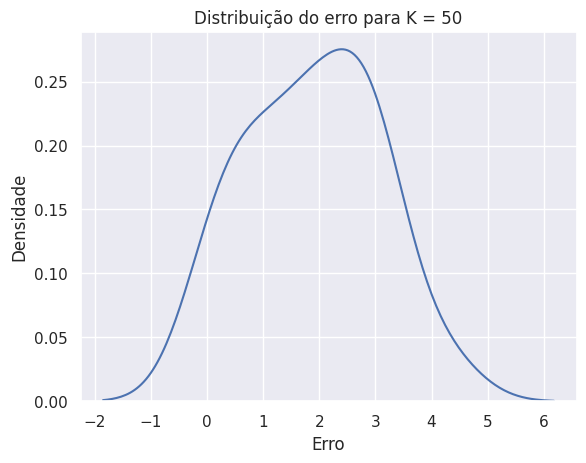

In [22]:
sns.distplot(K50['erro'], hist=False, label='K = 50')
plt.ylabel('Densidade')
plt.xlabel('Erro')
plt.title('Distribuição do erro para K = 50')
plt.show()

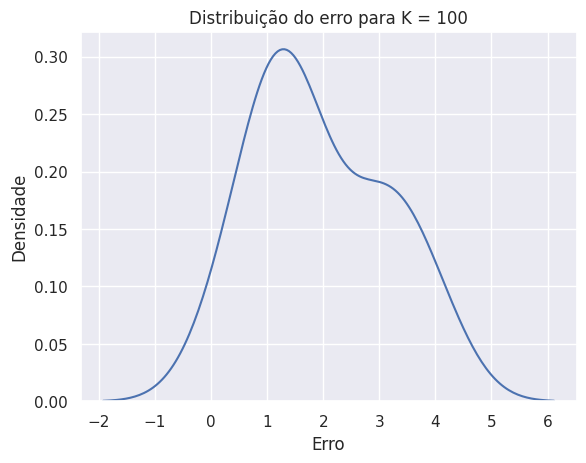

In [23]:
sns.distplot(K100['erro'], hist=False, label='K = 100')
plt.ylabel('Densidade')
plt.xlabel('Erro')
plt.title('Distribuição do erro para K = 100')
plt.show()

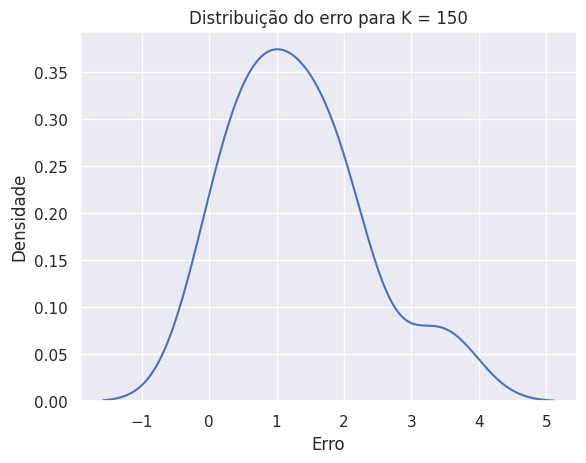

In [24]:
sns.distplot(K150['erro'], hist=False, label='K = 150')
plt.ylabel('Densidade')
plt.xlabel('Erro')
plt.title('Distribuição do erro para K = 150')
plt.show()

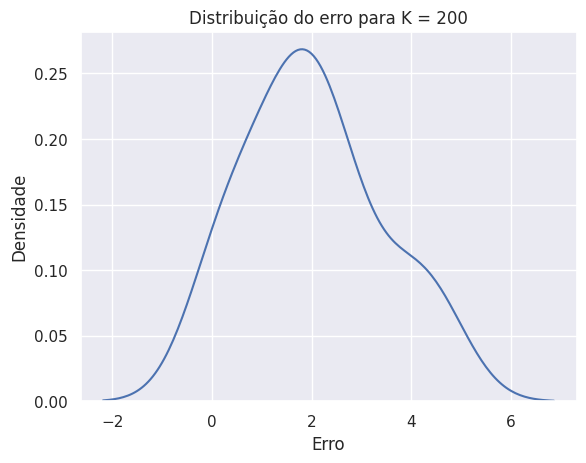

In [25]:
sns.distplot(K200['erro'], hist=False, label='K = 200')
plt.ylabel('Densidade')
plt.xlabel('Erro')
plt.title('Distribuição do erro para K = 200')
plt.show()

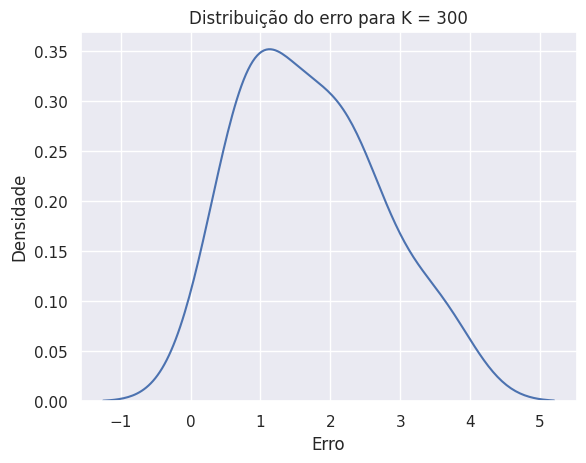

In [26]:
sns.distplot(K300['erro'], hist=False, label='K = 300')
plt.ylabel('Densidade')
plt.xlabel('Erro')
plt.title('Distribuição do erro para K = 300')
plt.show()

Observando os gráficos acima, podemos ver que as distribuições dos erros para K = 150 e K = 300 são semelhantes, com os valores mais concentrados entre -1 e 5. Para os demais valores de K, a curva é mais achatada, mostrando uma maior dispersão dos valores de erro. Portanto, apenas observando os dados, ficamos entre os fatores de compressão K = 150 e K = 300. Analisando média e desvio-padrão, todavia, temos que K = 150 é o melhor fator de compressão, com menor erro absoluto médio e menor desvio-padrão.

Prova que o K = 150 é valido como fator de compressão realizando um teste qualquer e plotando o grafico de s

Nota do usuário para o filme:  3.5
Nota aleatória do usuário para o filme:  4.003110198662202
Nota do usuário para o filme na matriz B:  3.3822605742844107


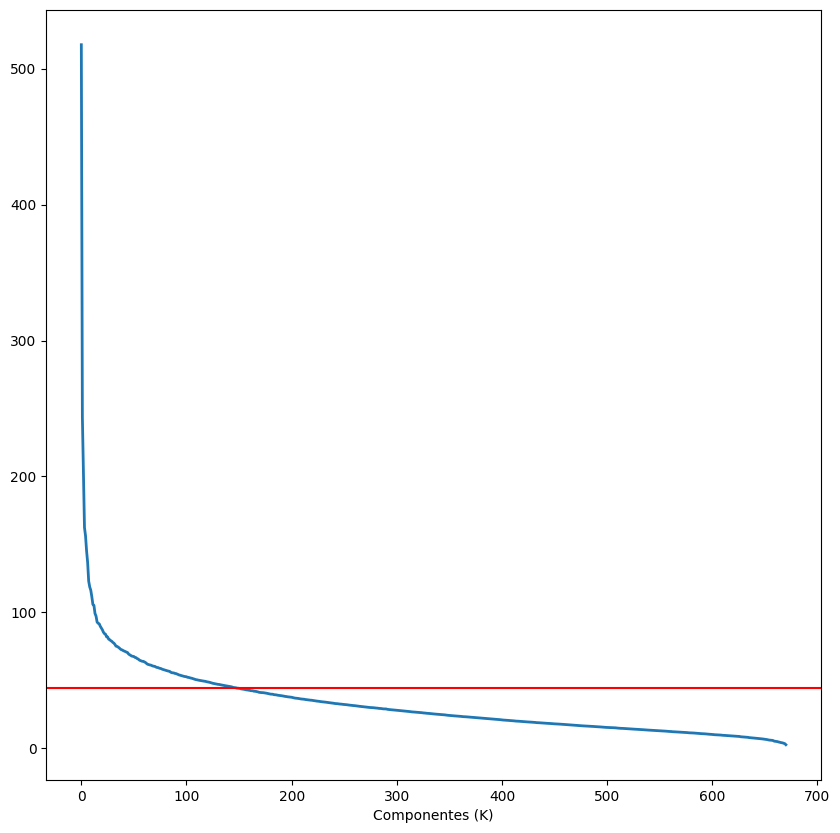

In [7]:
# vamos escolher uma linha aleatória do nosso df

linha = np.random.randint(0, df.__len__())

# vamos pegar o id do usuário e do filme dessa linha

id_usuario = df.iloc[linha]['userId']
id_filme = df.iloc[linha]['movieId']

# vamos pegar a nota que esse usuário deu para esse filme

nota = df.iloc[linha]['rating']

A = deepcopy(matriz_notas)

# vamos trocar a nota do usuário por um valor aleatorio entre 0.0 e 5.0 e salvar no nosso A

A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)

nota_aleatoria = A.loc[id_usuario, id_filme]

# SVD da matriz A

u, s, vt = svd(A)

# vamos comprimir a matriz A para 2 componentes

u_, s_, vt_ = comprimir(u, s, vt, 150)

sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])

# vamos reconstruir a matriz A com 2 componentes

B = u_ @ sigma @ vt_

# vamos ver a nota que o usuário deu para o filme

print('Nota do usuário para o filme: ', nota)

print('Nota aleatória do usuário para o filme: ', nota_aleatoria)

# vamos ver a nota que o usuário deu para o filme na matriz B
B = pd.DataFrame(B, index=A.index, columns=A.columns)
print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])

plt.figure(figsize=(10, 10))
plt.plot(s, linewidth=2)
# plota uma linha horizontal que passe na interseção do eixo x = 300
plt.axhline(y=s[150], color='r', linestyle='-')
plt.xlabel('Componentes (K)')
plt.show()